In [1]:
import seaborn as sns
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


import six

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

import anchor
modality_to_color = anchor.MODALITY_TO_COLOR.copy()
modality_to_color['constitutive'] = '#262626'
modality_order = ['excluded', 'bimodal', 'included', 'constitutive']
modality_palette = [modality_to_color[m] for m in modality_order]
modality_palette



import flotilla
flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)

import pybedtools

folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
csv_folder = '{}/csvs_for_paper/'.format(folder)
bed_folder = '{}/bed'.format(folder)



splicing_feature_folder = '{}/splicing_feature_data'.format(csv_folder)
alternative_feature_folder = '{}/alternative'.format(splicing_feature_folder)
constitutive_feature_folder = '{}/constitutive'.format(splicing_feature_folder)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-02-12 18:23:20	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-02-12 18:23:20	Parsing datapackage to create a Study object
2016-02-12 18:24:10	Initializing Study
2016-02-12 18:24:10	Initializing Predictor configuration manager for Study
2016-02-12 18:24:10	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-02-12 18:24:10	Added ExtraTreesClassifier to default predictors
2016-02-12 18:24:10	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-02-12 18:24:10	Added ExtraTreesRegressor to default predictors
2016-02-12 18:24:10	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-02-12 18:24:10	Added GradientBoostingClassifier to default predictors
2016-02-12 18:24:10	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [2]:
def make_phenotype_modality_format(constitutive_df):
    constitutive_df = constitutive_df.copy().reset_index()
    constitutive_df['modality'] = 'constitutive'
    dfs = []
    for phenotype in study.phenotype_order:
        df = constitutive_df.copy()#.reset_index()
        df['phenotype'] = phenotype
        dfs.append(df)
    df = pd.concat(dfs)
    six.print_(df.shape)
#     df.head()
    return df

In [3]:
sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})


In [4]:
figure_folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_transcript_features'
! mkdir $figure_folder

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure2_modalities/bayesian/gene_transcript_features': File exists


In [5]:
facet_kws = dict(col='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 col_order=study.phenotype_order, size=2)


In [6]:
plot_kws = dict(x='phenotype', hue='modality', hue_order=modality_order, palette=modality_palette,
                 order=study.phenotype_order)

## Exon length


In [7]:
prefix = 'exon_length'
csv = '{}.csv'.format(prefix)

In [8]:
constitutive_exon_lengths = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), 
                                          index_col=0, header=None, squeeze=True)
constitutive_exon_lengths.name = 'exon2_length'
constitutive_exon_lengths.index.name = 'event_id'
constitutive_exon_lengths.head()

event_id
exon:chr1:1341189-1341266:-      78
exon:chr1:1341189-1342399:-    1211
exon:chr1:1653035-1653150:-     116
exon:chr1:1650767-1650894:-     128
exon:chr1:1650797-1650894:-      98
Name: exon2_length, dtype: int64

In [9]:
constitutive_exon_lengths_modalities = make_phenotype_modality_format(constitutive_exon_lengths)
constitutive_exon_lengths_modalities.head()

(18204, 4)


,event_id,exon2_length,modality,phenotype
0,exon:chr1:1341189-1341266:-,78,constitutive,iPSC
1,exon:chr1:1341189-1342399:-,1211,constitutive,iPSC
2,exon:chr1:1653035-1653150:-,116,constitutive,iPSC
3,exon:chr1:1650767-1650894:-,128,constitutive,iPSC
4,exon:chr1:1650797-1650894:-,98,constitutive,iPSC


In [10]:
col = 'exon2_length'
modality_exon_lengths = study.supplemental.modalities_tidy.join(study.splicing.feature_data[col], on='event_id')
modality_exon_lengths = pd.concat([modality_exon_lengths, constitutive_exon_lengths_modalities])
modality_exon_lengths.head()

,event_id,exon2_length,modality,phenotype
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,233,included,MN
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,156,included,MN
2,exon:chr10:103348089-103348157:+@exon:chr10:10...,81,included,MN
3,exon:chr10:103360960-103361093:+@exon:chr10:10...,73,bimodal,MN
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,103,bimodal,MN


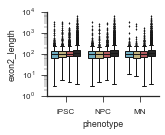

In [11]:
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.yscale('log')
sns.boxplot(data=modality_exon_lengths, y=col, linewidth=1, fliersize=2, **plot_kws)
ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
sns.despine()
fig.savefig('{}/{}_boxplots.pdf'.format(figure_folder, prefix))

In [12]:
from flotilla.visualize.generic import cdfplot

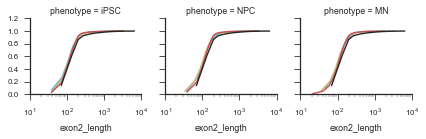

In [13]:
g = sns.FacetGrid(modality_exon_lengths, **facet_kws)
plt.xscale('log')
g.map(cdfplot, col)

Easier to see difference in boxplots .. sticking to boxplots

In [14]:
from scipy.stats.mstats import kruskalwallis

for phenotype, phenotype_df in modality_exon_lengths.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
        six.print_('\t\t', result)

MN
	 ambivalent
		 KruskalResult(statistic=2.604768308719843, pvalue=0.10654272727410843)
	 bimodal
		 KruskalResult(statistic=38.038883148857472, pvalue=6.9348715905731304e-10)
	 excluded
		 KruskalResult(statistic=35.341154345914823, pvalue=2.7672251217393929e-09)
	 included
		 KruskalResult(statistic=59.734277382522684, pvalue=1.085690554366177e-14)
NPC
	 ambivalent
		 KruskalResult(statistic=1.5037679490135676, pvalue=0.22009251041652933)
	 bimodal
		 KruskalResult(statistic=75.284506305690428, pvalue=4.0754521020849019e-18)
	 excluded
		 KruskalResult(statistic=75.619729156226185, pvalue=3.4390805413311279e-18)
	 included
		 KruskalResult(statistic=75.093616679861825, pvalue=4.4891536181908836e-18)
iPSC
	 ambivalent
		 KruskalResult(statistic=0.29882360344735132, pvalue=0.58462085728296898)
	 bimodal
		 KruskalResult(statistic=51.906014723087424, pvalue=5.822179356899471e-13)
	 concurrent
		 KruskalResult(statistic=2.9508869135868934, pvalue=0.085830442204449464)
	 excluded
		 Kru

## Intron length

In [15]:
prefix = 'intron_length'
csv = '{}.csv'.format(prefix)

In [16]:
constitutive_intron_lengths = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), 
                                          index_col=0, header=None, squeeze=True)
constitutive_intron_lengths.name = 'intron_length'
constitutive_intron_lengths.index.name = 'event_id'
constitutive_intron_lengths.head()

event_id
exon:chr10:102039881-102039985:-     5441.500000
exon:chr10:102040691-102040810:-     4245.500000
exon:chr10:102045854-102045970:-    11091.666667
exon:chr10:102045854-102046089:-    11227.666667
exon:chr10:102286732-102286831:-     4130.500000
Name: intron_length, dtype: float64

In [17]:
constitutive_intron_lengths_modalities = make_phenotype_modality_format(constitutive_intron_lengths)
constitutive_intron_lengths_modalities.head()

(18204, 4)


,event_id,intron_length,modality,phenotype
0,exon:chr10:102039881-102039985:-,5441.500000,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,4245.500000,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,11091.666667,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,11227.666667,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,4130.500000,constitutive,iPSC


In [18]:
col = 'intron_length'
log_col = '$\log_{10}$ Intron Length'
modality_introns = study.supplemental.modalities_tidy.join(study.splicing.feature_data[col], on='event_id')
modality_introns = pd.concat([modality_introns, constitutive_intron_lengths_modalities])
modality_introns[log_col] = np.log10(modality_introns[col])
modality_introns.head()

,event_id,intron_length,modality,phenotype,$\log_{10}$ Intron Length
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,6101,included,MN,3.785401
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,3045,included,MN,3.483587
2,exon:chr10:103348089-103348157:+@exon:chr10:10...,12337,included,MN,4.091210
3,exon:chr10:103360960-103361093:+@exon:chr10:10...,7498,bimodal,MN,3.874945
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,8030,bimodal,MN,3.904716


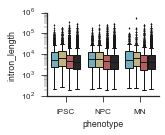

In [19]:
fig, ax = plt.subplots(figsize=(2, 1.5))
plt.yscale('log')
sns.boxplot(data=modality_introns, y=col, linewidth=1, fliersize=2, **plot_kws)
ax.legend_.set_visible(False)
# ax.locator_params('y', nbins=4)
sns.despine()
fig.savefig('{}/{}_boxplot.pdf'.format(figure_folder, col))

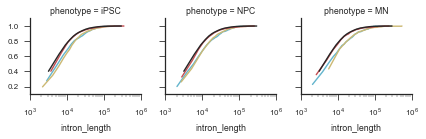

In [20]:
g = sns.FacetGrid(modality_introns, **facet_kws)
plt.xscale('log')
g.map(cdfplot, col)

In [21]:
from scipy.stats.mstats import kruskalwallis

for phenotype, phenotype_df in modality_introns.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[log_col], constitutive[log_col])
        six.print_('\t\t', result)

MN
	 ambivalent
		 KruskalResult(statistic=1.7279647057356018, pvalue=0.18867103226487603)
	 bimodal
		 KruskalResult(statistic=47.685500374548702, pvalue=5.0037879392604569e-12)
	 excluded
		 KruskalResult(statistic=28.109957951673255, pvalue=1.14614610697973e-07)
	 included
		 KruskalResult(statistic=0.21332624970889466, pvalue=0.6441727220907254)
NPC
	 ambivalent
		 KruskalResult(statistic=1.6294605034829712, pvalue=0.20177768473587632)
	 bimodal
		 KruskalResult(statistic=56.794140231867573, pvalue=4.8390618111595525e-14)
	 excluded
		 KruskalResult(statistic=60.999600796570313, pvalue=5.7086383221692144e-15)
	 included
		 KruskalResult(statistic=5.0238806705713275, pvalue=0.025000079643559218)
iPSC
	 ambivalent
		 KruskalResult(statistic=0.57166511954342558, pvalue=0.44959799991582061)
	 bimodal
		 KruskalResult(statistic=126.31517580509183, pvalue=2.6232986076475474e-29)
	 concurrent
		 KruskalResult(statistic=0.081123762129892085, pvalue=0.77578026031447345)
	 excluded
		 Kruska

## Gene expression

In [22]:
study.splicing.feature_expression_id_col = 'ensembl_id'
splicing_tidy = study.tidy_splicing_with_expression.copy()
six.print_(splicing_tidy.shape)
singles_not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)
splicing_tidy_singles = splicing_tidy.ix[splicing_tidy.sample_id.isin(singles_not_outliers)]
six.print_(splicing_tidy_singles.shape)
splicing_tidy_singles = splicing_tidy_singles.join(study.sample_id_to_phenotype, on='sample_id')

(1082690, 5)
(926826, 5)


In [23]:
splicing_tidy_singles.head()

,event_name,sample_id,psi,common_id,expression,phenotype
3,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1,ENSG00000107521,3.08626,iPSC
4,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0,ENSG00000107521,22.27229,iPSC
5,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0,ENSG00000107521,56.92820,iPSC
7,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_10,0,ENSG00000107521,68.48693,iPSC
8,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_11,0,ENSG00000107521,142.31690,iPSC


In [24]:
constitutive_genes = pd.read_csv('{}/genes_expanded.csv'.format(constitutive_feature_folder), 
                                 header=None, index_col=0, squeeze=True)
constitutive_genes.name = 'common_id'
constitutive_genes.index.name = 'event_id'
constitutive_genes.head()

event_id
exon:chr10:102039881-102039985:-    ENSG00000196072
exon:chr10:102040691-102040810:-    ENSG00000196072
exon:chr10:102045854-102045970:-    ENSG00000196072
exon:chr10:102045854-102046089:-    ENSG00000196072
exon:chr10:102286732-102286831:-    ENSG00000075826
Name: common_id, dtype: object

In [25]:
constitutive_genes_modalities = make_phenotype_modality_format(constitutive_genes)
constitutive_genes_modalities.head()

(19398, 4)


,event_id,common_id,modality,phenotype
0,exon:chr10:102039881-102039985:-,ENSG00000196072,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,ENSG00000196072,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,ENSG00000196072,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,ENSG00000196072,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC


In [26]:
splicing_tidy_singles.head()

,event_name,sample_id,psi,common_id,expression,phenotype
3,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_06,1,ENSG00000107521,3.08626,iPSC
4,exon:chr10:100190328-100190427:-@exon:chr10:10...,P1_10,0,ENSG00000107521,22.27229,iPSC
5,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_03,0,ENSG00000107521,56.92820,iPSC
7,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_10,0,ENSG00000107521,68.48693,iPSC
8,exon:chr10:100190328-100190427:-@exon:chr10:10...,P2_11,0,ENSG00000107521,142.31690,iPSC


In [27]:
constitutive_genes_modalities_expression = constitutive_genes_modalities.merge(
    splicing_tidy_singles, left_on=['common_id', 'phenotype'], right_on=['common_id', 'phenotype'])
constitutive_genes_modalities_expression.head()

,event_id,common_id,modality,phenotype,event_name,sample_id,psi,expression
0,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_01,1,0
1,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_01,1,0
2,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_01,1,0
3,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_02,1,0
4,exon:chr10:102286732-102286831:-,ENSG00000075826,constitutive,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,P1_02,1,0


In [28]:

modalities_expression = study.supplemental.modalities_tidy.merge(
    splicing_tidy_singles, left_on=['event_id', 'phenotype'], right_on=['event_name', 'phenotype'])
modalities_expression = modalities_expression.drop('event_name', axis=1, errors='ignore')
modalities_expression = pd.concat([modalities_expression, constitutive_genes_modalities_expression])
six.print_(modalities_expression.shape)
modalities_expression = modalities_expression.join(modalities_expression.groupby(['event_id', 'sample_id']).expression.sum(),
                           on=['event_id', 'sample_id'], rsuffix='_summed', lsuffix='_original')

modalities_expression['log2(TPM+1)'] = np.log2(modalities_expression.expression_summed+1)
modalities_expression.head()

(2858668, 8)


,common_id,event_id,event_name,expression_original,modality,phenotype,psi,sample_id,expression_summed,log2(TPM+1)
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,313.077,included,MN,1,M1_01,313.077,8.294974
1,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,196.519,included,MN,1,M1_02,196.519,7.625848
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,191.162,included,MN,1,M1_07,191.162,7.586179
3,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,262.900,included,MN,1,M1_08,262.900,8.043848
4,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,321.496,included,MN,1,M1_09,321.496,8.333137


In [29]:
mean_expression = modalities_expression.groupby(['event_id', 'sample_id'])['expression_original'].mean()

mean_expression.name = 'expression_mean'


modalities_expression = modalities_expression.join(mean_expression, on=['event_id', 'sample_id'])
modalities_expression.head()

,common_id,event_id,event_name,expression_original,modality,phenotype,psi,sample_id,expression_summed,log2(TPM+1),expression_mean
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,313.077,included,MN,1,M1_01,313.077,8.294974,313.077
1,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,196.519,included,MN,1,M1_02,196.519,7.625848,196.519
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,191.162,included,MN,1,M1_07,191.162,7.586179,191.162
3,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,262.900,included,MN,1,M1_08,262.900,8.043848,262.900
4,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,321.496,included,MN,1,M1_09,321.496,8.333137,321.496


In [30]:
modalities_expression['expression_mean_log2_plus1'] = np.log2(modalities_expression.expression_mean+1)
modalities_expression.head()

,common_id,event_id,event_name,expression_original,modality,phenotype,psi,sample_id,expression_summed,log2(TPM+1),expression_mean,expression_mean_log2_plus1
0,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,313.077,included,MN,1,M1_01,313.077,8.294974,313.077,8.294974
1,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,196.519,included,MN,1,M1_02,196.519,7.625848,196.519,7.625848
2,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,191.162,included,MN,1,M1_07,191.162,7.586179,191.162,7.586179
3,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,262.900,included,MN,1,M1_08,262.900,8.043848,262.900,8.043848
4,ENSG00000099194,exon:chr10:102114184-102114389:+@exon:chr10:10...,NaN,321.496,included,MN,1,M1_09,321.496,8.333137,321.496,8.333137


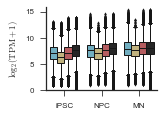

In [31]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.boxplot(y='expression_mean_log2_plus1', data=modalities_expression, linewidth=1, fliersize=3, **plot_kws)
ax.legend_.set_visible(False)
sns.despine()
ax.set(xlabel='', ylabel='$\log_{2}(\mathrm{TPM} + 1)$', ylim=(0, 16))
ax.locator_params('y', nbins=4)
fig.savefig('{}/expression.pdf'.format(figure_folder))

In [32]:
modalities_expression_phenotype_mean = modalities_expression.groupby(
    ['phenotype', 'modality', 'common_id'])['log2(TPM+1)'].mean()
modalities_expression_phenotype_mean = modalities_expression_phenotype_mean.reset_index()
modalities_expression_phenotype_mean = modalities_expression_phenotype_mean.rename(columns={'log2(TPM+1)': 'mean(log2(TPM+1))'})
modalities_expression_phenotype_mean.head()

,phenotype,modality,common_id,mean(log2(TPM+1))
0,MN,ambivalent,ENSG00000092841,11.143128
1,MN,bimodal,ENSG00000003756,8.150204
2,MN,bimodal,ENSG00000005483,7.689427
3,MN,bimodal,ENSG00000008294,8.129552
4,MN,bimodal,ENSG00000009307,8.526918


In [33]:
modalities_expression_phenotype_var = modalities_expression.groupby(
    ['phenotype', 'modality', 'common_id'])['log2(TPM+1)'].var()
modalities_expression_phenotype_var.name = 'var(log2(TPM+1))'
modalities_expression_phenotype_var.head()

phenotype  modality    common_id      
MN         ambivalent  ENSG00000092841    0.959718
           bimodal     ENSG00000003756    1.557244
                       ENSG00000005483    1.970124
                       ENSG00000008294    2.114065
                       ENSG00000009307    2.104705
Name: var(log2(TPM+1)), dtype: float64

In [34]:
modalities_expresion_phenotype = modalities_expression_phenotype_mean.join(
    modalities_expression_phenotype_var, on=['phenotype', 'modality', 'common_id'])
modalities_expresion_phenotype.head()

,phenotype,modality,common_id,mean(log2(TPM+1)),var(log2(TPM+1))
0,MN,ambivalent,ENSG00000092841,11.143128,0.959718
1,MN,bimodal,ENSG00000003756,8.150204,1.557244
2,MN,bimodal,ENSG00000005483,7.689427,1.970124
3,MN,bimodal,ENSG00000008294,8.129552,2.114065
4,MN,bimodal,ENSG00000009307,8.526918,2.104705


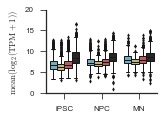

In [35]:
fig, ax = plt.subplots(figsize=(2, 1.5))
sns.boxplot(y='mean(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, **plot_kws)
ax.legend_.set_visible(False)
sns.despine()
ax.set(xlabel='', ylabel=r'$\mathrm{mean}\left(\log_{2}(\mathrm{TPM} + 1)\right)$')
ax.locator_params('y', nbins=4)
fig.savefig('{}/expression_mean_within_phenotype.pdf'.format(figure_folder))

In [45]:
from scipy.stats.mstats import kruskalwallis

col = 'mean(log2(TPM+1))'

for phenotype, phenotype_df in modalities_expresion_phenotype.groupby(['phenotype']):
    six.print_(phenotype)
    grouped = phenotype_df.groupby('modality')
    constitutive = grouped.get_group('constitutive')
    
    for modality, modality_df in grouped:
        if modality == 'constitutive':
            continue
        six.print_('\t', modality)

        result = kruskalwallis(modality_df[col], constitutive[col])
        six.print_('\t\t', result)

MN
	 ambivalent
		 KruskalResult(statistic=2.2866567696592619, pvalue=0.13049073340952758)
	 bimodal
		 KruskalResult(statistic=193.27156802895362, pvalue=6.1411486010032202e-44)
	 excluded
		 KruskalResult(statistic=84.25939092172689, pvalue=4.3393736319586775e-20)
	 included
		 KruskalResult(statistic=144.06352006553507, pvalue=3.4411463895023011e-33)
NPC
	 ambivalent
		 KruskalResult(statistic=0.14369948649470468, pvalue=0.70463057307404475)
	 bimodal
		 KruskalResult(statistic=503.37483333319182, pvalue=1.7525869243666787e-111)
	 excluded
		 KruskalResult(statistic=320.44723500881759, pvalue=1.1574013441635315e-71)
	 included
		 KruskalResult(statistic=414.26946115628806, pvalue=4.3130651205742543e-92)
iPSC
	 ambivalent
		 KruskalResult(statistic=7.7824540308834784, pvalue=0.00527560849200648)
	 bimodal
		 KruskalResult(statistic=803.08916264999164, pvalue=1.1492728957683028e-176)
	 concurrent
		 KruskalResult(statistic=1.9378201492638829, pvalue=0.16390541447542739)
	 excluded
		 

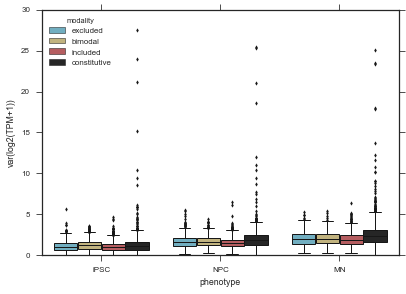

In [36]:
sns.boxplot(y='var(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, **plot_kws)


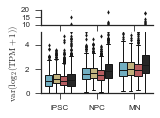

In [37]:
fig, axes = plt.subplots(figsize=(2, 1.5), nrows=2, gridspec_kw=dict(height_ratios=(0.2, 0.8), hspace=0.2))
ax = axes[0]
sns.boxplot(y='var(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, ax=ax, **plot_kws)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
# sns.despine(ax=ax, bottom=True)
ax.set(ylim=(10, 20), ylabel='')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

ax = axes[1]
sns.boxplot(y='var(log2(TPM+1))', data=modalities_expresion_phenotype, linewidth=1, fliersize=3, ax=ax, **plot_kws)
ax.legend_.set_visible(False)
ax.locator_params('y', nbins=4)
sns.despine()

ax.set(xlabel='', ylabel=r'$\mathrm{var}\left(\log_{2}(\mathrm{TPM} + 1)\right)$', ylim=(0, 5))

fig.savefig('{}/expression_var_within_phenotype.pdf'.format(figure_folder))

## Exon splice site scores

In [38]:
prefix = 'maxentscan'
csv = '{}.csv'.format(prefix)

In [39]:
constitutive_maxentscan = pd.read_csv('{}/{}'.format(constitutive_feature_folder, csv), index_col=0)
constitutive_maxentscan.index.name = 'event_id'
constitutive_maxentscan.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr10:102039881-102039985:-,8.01,GTTTTTCTTTGTTTTTAAAGATG,3.95,TGGGTAACC
exon:chr10:102040691-102040810:-,5.71,TCTTCTGTTTAATTTTCAAGCCA,8.62,AATGTAAGT
exon:chr10:102045854-102045970:-,5.19,GTCATTCTCCCTTGGCCCAGACG,8.48,CGGGTGAGG
exon:chr10:102045854-102046089:-,2.61,AGGACTTGAAATTATGGCAGATG,8.48,CGGGTGAGG
exon:chr10:102286732-102286831:-,9.47,AAGTTCTTGCTGTCTTTCAGGTA,10.10,CCGGTAAGA


In [40]:
score_cols = constitutive_maxentscan.describe().columns
constitutive_maxentscan.describe()

,splice_site_3p_score,splice_site_5p_score
count,6250.000000,6250.000000
mean,7.941776,8.077552
std,3.810663,3.211467
min,-32.040000,-31.740000
25%,6.690000,7.370000
50%,8.490000,8.760000
75%,10.127500,9.880000
max,15.210000,11.810000


In [41]:
constitutive_maxentscan.loc[(constitutive_maxentscan[score_cols] < 0).any(axis=1)]

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr10:103917206-103917312:+,-13.13,AGCTGTACCTGCCAAGCGAGTCG,4.86,CAGGTTTGC
exon:chr10:112359412-112359570:+,-0.42,AAATGGATAATGTCATATAGCAA,10.86,CAGGTAAGT
exon:chr10:126092367-126092489:-,9.83,TATTCCTGTTTCTTCTGTAGCGT,-1.28,CAGGTTGTC
exon:chr10:133786538-133786622:-,-1.37,ATTCTATTCACATCGCCAAGCCC,9.88,CAGGTAAGC
exon:chr10:33218769-33218972:-,4.60,ATATTTTATATGTCATTTAGACA,-7.95,TTGGTTTTG
exon:chr10:33221434-33221528:-,11.35,TTCTTTCTTCTTTCTGACAGATG,-0.35,AAGGTTGCT
exon:chr10:51610393-51610425:-,-7.14,GAATATGGTGACTAGGCAAGGGG,10.24,TGGGTAAGT
exon:chr10:92655637-92655674:+,7.34,CTTTGTTCATTTTATTTCAGCCT,-4.71,TCTGTATCC
exon:chr11:10821099-10821156:-,-0.17,CATATATAAATGGATTAAAGATA,9.14,TAGGTAAGA


In [42]:
constitutive_maxentscan_modalities = make_phenotype_modality_format(constitutive_maxentscan)
constitutive_maxentscan_modalities.head()

(18750, 7)


,event_id,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,modality,phenotype
0,exon:chr10:102039881-102039985:-,8.01,GTTTTTCTTTGTTTTTAAAGATG,3.95,TGGGTAACC,constitutive,iPSC
1,exon:chr10:102040691-102040810:-,5.71,TCTTCTGTTTAATTTTCAAGCCA,8.62,AATGTAAGT,constitutive,iPSC
2,exon:chr10:102045854-102045970:-,5.19,GTCATTCTCCCTTGGCCCAGACG,8.48,CGGGTGAGG,constitutive,iPSC
3,exon:chr10:102045854-102046089:-,2.61,AGGACTTGAAATTATGGCAGATG,8.48,CGGGTGAGG,constitutive,iPSC
4,exon:chr10:102286732-102286831:-,9.47,AAGTTCTTGCTGTCTTTCAGGTA,10.10,CCGGTAAGA,constitutive,iPSC


In [43]:
constitutive_maxentscan.loc[(constitutive_maxentscan[score_cols] < 0).all(axis=1)]

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr15:66795029-66795088:-,-2.26,ATTCTTGACTGGAAAAATAGATG,-5.89,AGAGTGAAC
exon:chr4:77977115-77977253:-,-5.84,CCCCTTTGCTTTGGATAGAGAAT,-0.21,ATTGTAAAT
exon:chr7:87839398-87839445:-,-2.20,AATCCTTGATTACAGTTCAGAGA,-19.00,TGGGCTGTA


In [46]:
alternative_maxentscan = pd.read_csv('{}/{}'.format(alternative_feature_folder, csv), index_col=0)
alternative_maxentscan.index.name = 'event_id'
alternative_maxentscan.head()

,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
event_id,,,,
exon:chr10:100190328-100190427:-@exon:chr10:100189548-100189646:-@exon:chr10:100189330-100189399:-,7.77,CTCTCCCCTGCCCTGCACAGCCT,6.96,ACGGTGTGT
exon:chr10:100193697-100193848:-@exon:chr10:100190888-100191048:-@exon:chr10:100190328-100190427:-,9.08,TCCCTTCCTGCCCTGGCTAGGCC,7.96,TAGGTGAGC
exon:chr10:100195392-100195529:-@exon:chr10:100195029-100195171:-@exon:chr10:100193697-100193848:-,7.92,TGGCCTGCCTGTGCCTGCAGTTT,6.05,GGAGTGAGT
exon:chr10:101165513-101165617:-@exon:chr10:101163481-101163631:-@exon:chr10:101163226-101163391:-,10.79,CTCACTTTGCTTCCCCGCAGCAC,8.34,ACAGTGAGT
exon:chr10:101419263-101419345:+@exon:chr10:101419619-101419721:+@exon:chr10:101421203-101421385:+,5.04,CTGAAATCAAATCTTTCTAGGCT,9.31,TAGGTAAGG


In [47]:
modalities_maxentscan = study.supplemental.modalities_tidy.join(alternative_maxentscan, on='event_id')
modalities_maxentscan = pd.concat([modalities_maxentscan, constitutive_maxentscan_modalities])
modalities_maxentscan.tail()

,event_id,modality,phenotype,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq
6245,exon:chrX:80532483-80532668:+,constitutive,MN,8.56,TTCTTGTCCTTTGGTCCTAGATT,7.83,GGGGTAAGA
6246,exon:chrX:80533830-80533910:+,constitutive,MN,7.00,CTTATCTTCTTTTCATCAAGGAC,9.11,AAGGTATGA
6247,exon:chrX:99887482-99887565:-,constitutive,MN,11.13,TGTTTTTTTCCTCCCATTAGGGT,10.08,CAAGTAAGT
6248,exon:chrX:99890175-99890249:-,constitutive,MN,10.90,CTTTCTTTCTTATCCTGCAGTAT,9.85,GAGGTAAGC
6249,exon:chrX:99890555-99890743:-,constitutive,MN,6.84,TTCTCTGAATTCCCACATAGATC,10.10,CTGGTGAGT


In [58]:
score_cols

Index([u'splice_site_3p_score', u'splice_site_5p_score'], dtype='object')

In [60]:
modalities_maxentscan.head()

,event_id,modality,phenotype,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,splice_site_3p_seq_2bp,splice_site_5p_seq_2bp
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,7.55,TGTCTGGTCTGTCAATGTAGGTA,10.24,TGGGTAAGT,AG,GT
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,NaN,NaN,NaN,NaN,NaN,NaN
2,exon:chr10:103348089-103348157:+@exon:chr10:10...,included,MN,NaN,NaN,NaN,NaN,NaN,NaN
3,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,MN,5.57,TGCTTGCTGCTTTTCTAAAGGCG,9.81,GAGGTATGT,AG,GT
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,MN,NaN,NaN,NaN,NaN,NaN,NaN


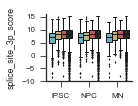

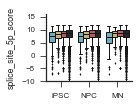

In [62]:
for col in score_cols:

    fig, ax = plt.subplots(figsize=(2, 1.5))
    sns.boxplot(data=modalities_maxentscan, y=col, linewidth=1, fliersize=2, **plot_kws)
    ax.set(ylim=(-10, 16), xlabel='')
    ax.legend_.set_visible(False)
    sns.despine()
    fig.tight_layout()
    fig.savefig('{}/{}.pdf'.format(figure_folder, col))

In [64]:
from scipy.stats.mstats import kruskalwallis

for col in score_cols:
    six.print_('--- {} ---'.format(col))
    for phenotype, phenotype_df in modalities_maxentscan.groupby(['phenotype']):
        six.print_(phenotype)
        grouped = phenotype_df.groupby('modality')
        constitutive = grouped.get_group('constitutive')

        for modality, modality_df in grouped:
            if modality == 'constitutive':
                continue
            six.print_('\t', modality)

            result = kruskalwallis(modality_df[col], constitutive[col])
            six.print_('\t\t', result)

--- splice_site_3p_score ---
MN
	 ambivalent
		 KruskalResult(statistic=0.0, pvalue=1.0)
	 bimodal
		 KruskalResult(statistic=3.1373111699858369, pvalue=0.076519860240374757)
	 excluded
		 KruskalResult(statistic=49.14456253443371, pvalue=2.3777657021702309e-12)
	 included
		 KruskalResult(statistic=0.12068995011619124, pvalue=0.72828738447152319)
NPC
	 ambivalent
		 KruskalResult(statistic=1.866023144123389, pvalue=0.17193124957925521)
	 bimodal
		 KruskalResult(statistic=18.813637635588528, pvalue=1.4413283196333497e-05)
	 excluded
		 KruskalResult(statistic=115.76795568743613, pvalue=5.3429369128399008e-27)
	 included
		 KruskalResult(statistic=0.11438034389229586, pvalue=0.73521124608345079)
iPSC
	 ambivalent
		 KruskalResult(statistic=0.032768833861770777, pvalue=0.85635059097226296)
	 bimodal
		 KruskalResult(statistic=7.0253512190441274, pvalue=0.0080363707557734206)
	 concurrent
		 KruskalResult(statistic=0.0, pvalue=1.0)
	 excluded
		 KruskalResult(statistic=135.83297799951498

In [49]:
modalities_maxentscan['splice_site_3p_seq_2bp'] = modalities_maxentscan['splice_site_3p_seq'].str[-5:-3]
modalities_maxentscan['splice_site_5p_seq_2bp'] = modalities_maxentscan['splice_site_5p_seq'].str[3:5]
modalities_maxentscan

,event_id,modality,phenotype,splice_site_3p_score,splice_site_3p_seq,splice_site_5p_score,splice_site_5p_seq,splice_site_3p_seq_2bp,splice_site_5p_seq_2bp
0,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,7.55,TGTCTGGTCTGTCAATGTAGGTA,10.24,TGGGTAAGT,AG,GT
1,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,NaN,NaN,NaN,NaN,NaN,NaN
2,exon:chr10:103348089-103348157:+@exon:chr10:10...,included,MN,NaN,NaN,NaN,NaN,NaN,NaN
3,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,MN,5.57,TGCTTGCTGCTTTTCTAAAGGCG,9.81,GAGGTATGT,AG,GT
4,exon:chr10:103360960-103361093:+@exon:chr10:10...,bimodal,MN,NaN,NaN,NaN,NaN,NaN,NaN
5,exon:chr10:103563492-103563776:-@exon:chr10:10...,bimodal,MN,10.31,TTTTATTTTATTTTTTGCAGCTG,7.39,GCAGTGAGT,AG,GT
6,exon:chr10:103567487-103567658:-@exon:chr10:10...,included,MN,NaN,NaN,NaN,NaN,NaN,NaN
7,exon:chr10:104192283-104192325:-@exon:chr10:10...,included,MN,NaN,NaN,NaN,NaN,NaN,NaN
8,exon:chr10:104209950-104210087:+@exon:chr10:10...,bimodal,MN,7.12,CACTCACTTGTCTCCTTCAGCCT,7.23,TGGGTGAGC,AG,GT
9,exon:chr10:104241758-104241932:-@exon:chr10:10...,included,MN,11.60,TCTCCTCTTTGCCCATTCAGGTT,6.45,AGGGTAGGA,AG,GT


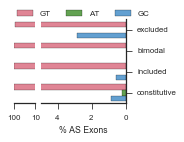

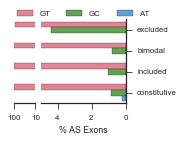

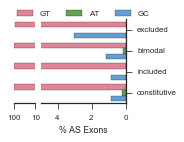

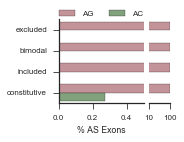

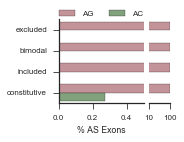

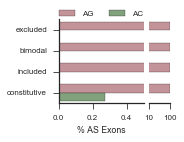

In [63]:
splice_site_seq_cols = 'splice_site_5p_seq_2bp', 'splice_site_3p_seq_2bp'

for col in splice_site_seq_cols:
    modalities_splice_sites = modalities_maxentscan.groupby(['phenotype', 'modality', col]).size()
    modalities_splice_sites = modalities_splice_sites.reset_index()
    modalities_splice_sites = modalities_splice_sites.rename(columns={0:'counts'})
    modalities_splice_sites['% AS Exons'] = 100 *modalities_splice_sites.groupby(
        ['phenotype', 'modality'])['counts'].apply(lambda x: x/x.sum())
    
    saturation = 0.8 if col == 'splice_site_5p_seq_2bp' else 0.4
    
    palette = sns.husl_palette(s=saturation, n_colors=3)
    
    for phenotype, phenotype_df in modalities_splice_sites.groupby('phenotype'):
        width_ratios = (0.2, 0.8) if col == 'splice_site_5p_seq_2bp' else (0.8, 0.2)
        fig, axes = plt.subplots(figsize=(2, 1.5), ncols=2, 
                                 gridspec_kw=dict(width_ratios=width_ratios, wspace=0.1))
        ax = axes[0]
        sns.barplot(data=phenotype_df, x='% AS Exons', ax=ax, ci=False, 
                    y='modality', hue=col, order=modality_order, palette=palette)
        ax.legend_.set_visible(False)
        ax.locator_params('x', nbins=4)
#         ax.xaxis.set_tick_params('off')
        if col == 'splice_site_5p_seq_2bp':
            ax.set(xlim=(10, 100), ylabel='', yticks=[], xlabel='', xticks=[10, 100])
            ax.invert_xaxis()
            sns.despine(ax=ax, left=True)

        else:
            ax.set(xlim=(0, 0.5), ylabel='', xlabel='% AS Exons')
            sns.despine(ax=ax)
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)


        ax = axes[1]
        sns.barplot(data=phenotype_df, x='% AS Exons', ax=ax, ci=False, y='modality', 
                    order=modality_order, hue=col, orient='h', palette=palette)
        ax.locator_params('x', nbins=4)
        ax.legend_.set_visible(False)

        if col == 'splice_site_5p_seq_2bp':
            # Somehow these "put the y-axis ticks on the right" functions 
            # only work in combination
            ax.yaxis.tick_right()
            ax.set(xlim=(0, 5), ylabel='', xlabel='% AS Exons')
            ax.invert_xaxis()
            ax.yaxis.set_ticks_position('right')
            sns.despine(ax=ax, left=True, right=False)
            ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3)
        else:
            ax.set(xlim=(10, 100), ylabel='', yticks=[], xlabel='', xticks=[10, 100])
            sns.despine(ax=ax, left=True)

#         legend_fig, legend_ax = plt.subplots(figsize=(0.5, 0.5))
#         legend_ax.legend(*ax.get_legend_handles_labels())

        fig.savefig('{}/{}_{}_barplot.pdf'.format(figure_folder, col, phenotype))

In [54]:
modalities_splice_sites = modalities_maxentscan.groupby(['phenotype', 'modality', col]).size()
modalities_splice_sites = modalities_splice_sites.reset_index()
modalities_splice_sites = modalities_splice_sites.rename(columns={0:'counts'})
modalities_splice_sites['% AS Exons'] = 100 *modalities_splice_sites.groupby(
    ['phenotype', 'modality'])['counts'].apply(lambda x: x/x.sum())

modalities_splice_sites.head()

,phenotype,modality,splice_site_3p_seq_2bp,counts,% AS Exons
0,MN,bimodal,AG,208,100.000
1,MN,constitutive,AC,17,0.272
2,MN,constitutive,AG,6233,99.728
3,MN,excluded,AG,212,100.000
4,MN,included,AG,894,100.000


In [55]:
modalities_splice_sites

,phenotype,modality,splice_site_3p_seq_2bp,counts,% AS Exons
0,MN,bimodal,AG,208,100.000
1,MN,constitutive,AC,17,0.272
2,MN,constitutive,AG,6233,99.728
3,MN,excluded,AG,212,100.000
4,MN,included,AG,894,100.000
5,NPC,ambivalent,AG,1,100.000
6,NPC,bimodal,AG,379,100.000
7,NPC,constitutive,AC,17,0.272
8,NPC,constitutive,AG,6233,99.728
9,NPC,excluded,AG,479,100.000


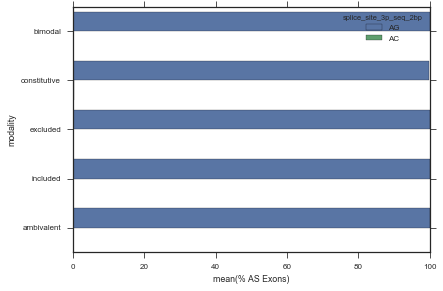

In [56]:
sns.barplot(y='modality', x='% AS Exons', data=modalities_splice_sites, hue=col, orient='h')

In [57]:
modalities_splice_sites

,phenotype,modality,splice_site_3p_seq_2bp,counts,% AS Exons
0,MN,bimodal,AG,208,100.000
1,MN,constitutive,AC,17,0.272
2,MN,constitutive,AG,6233,99.728
3,MN,excluded,AG,212,100.000
4,MN,included,AG,894,100.000
5,NPC,ambivalent,AG,1,100.000
6,NPC,bimodal,AG,379,100.000
7,NPC,constitutive,AC,17,0.272
8,NPC,constitutive,AG,6233,99.728
9,NPC,excluded,AG,479,100.000
